In [ ]:
%matplotlib inline


# Entropy

In information theory, information entropy is the log-base-2 of the number of
possible outcomes for a message.

For an image, local entropy is related to the complexity contained in a given
neighborhood, typically defined by a structuring element. The entropy filter can
detect subtle variations in the local gray level distribution.

In the first example, the image is composed of two surfaces with two slightly
different distributions. The image has a uniform random distribution in the
range [-15, +15] in the middle of the image and a uniform random distribution in
the range [-14, 14] at the image borders, both centered at a gray value of 128.
To detect the central square, we compute the local entropy measure using a
circular structuring element of a radius big enough to capture the local gray
level distribution. The second example shows how to detect texture in the camera
image using a smaller structuring element.


## Object detection



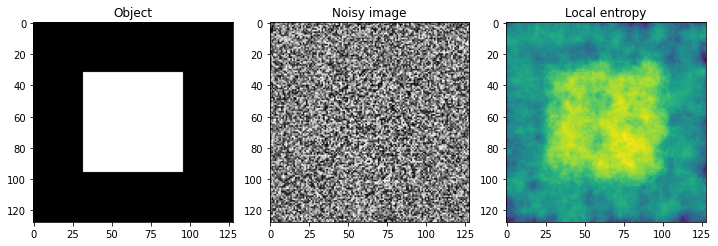

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

img0 = ax0.imshow(noise_mask, cmap='gray')
ax0.set_title("Object")
ax1.imshow(img, cmap='gray')
ax1.set_title("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_title("Local entropy")

fig.tight_layout()

## Texture detection



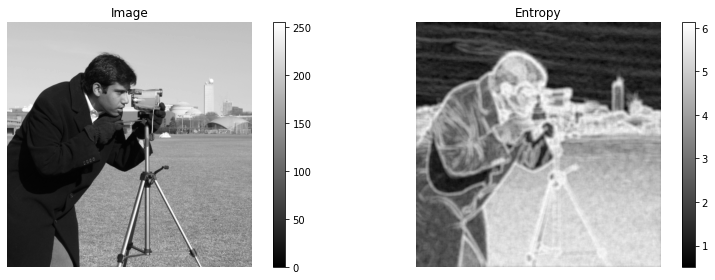

In [2]:
image = img_as_ubyte(data.camera())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()